In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('online.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.describe().head(4)

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000


In [5]:
df.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
x=df.drop(['Profit'],axis=1)

In [8]:
x.head(2)

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg


In [9]:
y=df['Profit']

In [10]:
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

One Hot Encoding

In [11]:
city=pd.get_dummies(x['Area'],drop_first=True)

In [12]:
city.head()

,Dhaka,Rangpur
0,True,False
1,False,False
2,False,True
3,True,False
4,False,True


In [13]:
x=x.drop('Area',axis=1)

In [14]:
x.head(3)

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54


In [15]:
x=pd.concat([x,city],axis=1)

In [30]:
x.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,True,False
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,False,True
3,144372.41,118671.85,383199.62,True,False
4,142107.34,91391.77,366168.42,False,True


In [17]:
from sklearn.model_selection import train_test_split as tts

In [18]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.25,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg=LinearRegression()

In [21]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [22]:
xtest

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
13,91992.39,135495.07,252664.93,False,False
39,38558.51,82982.09,174999.30,False,False
30,61994.48,115641.28,91131.24,False,True
45,1000.23,124153.04,1903.93,True,False
17,94657.16,145077.58,282574.31,True,False
48,542.05,51743.15,0.00,True,False
26,75328.87,144135.98,134050.07,False,True
25,64664.71,139553.16,137962.62,False,False
32,63408.86,129219.61,46085.25,False,False
19,86419.70,153514.11,0.00,True,False


In [23]:
ytest

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
Name: Profit, dtype: float64

In [24]:
y_pred=reg.predict(xtest)

In [25]:
y_pred

array([127455.83761591,  84429.71373072,  90326.58109175,  43108.78632384,
       131415.08987379,  42179.03330105, 103330.43901221,  98726.21271646,
        89351.69956496,  99923.24489889, 126233.54491857, 168825.45215129,
        89930.48929136])

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(ytest,y_pred)

0.8842583676807756

In [28]:
reg.score(xtest,ytest)

0.8842583676807756

AttributeError: 'DataFrame' object has no attribute 'Predicted'

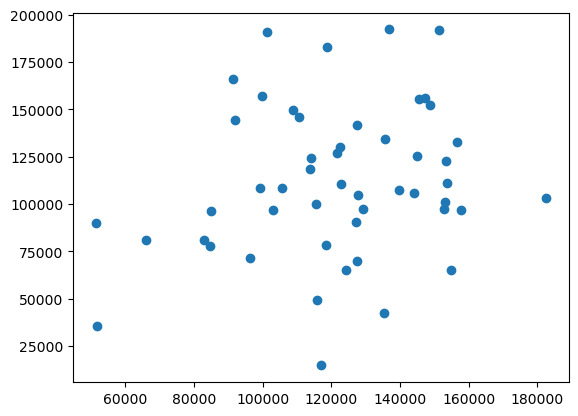

In [29]:
plt.scatter(df['Administration'],df['Profit'])
plt.plot(x,df.Predicted)
plt.scatter(x,df.Predicted,color='red')
plt.xlabel('Administration')
plt.ylabel('Profit')

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data=df)
plt.show()